# Analyzing Covid
In this Notebook I will take a closer look on the COVID-19 pandemic in Berlin since March 2020. As main tools I will use [DateTime](https://pypi.org/project/DateTime) and [Seaborn](https://seaborn.pydata.org).

The data are publicly provided by the Berlin Health Department (**La**ndesamt für **Ge**sundheit und **So**ziales, LaGeSo) and can be downloaded [here](https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona).

## Importing libraries
First of all, I dowload all important libraries for my project.

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as  mdates
from matplotlib.dates import MonthLocator
import seaborn as sns

## Preparing the data
### New cases and 7-day incidence rate
For my analyses I will use three data sets. First, I will use a data set with some core indicators for the whole city. Because I am interested in the development over time I will transform the date column *datum* into a datetime format and define it as index.

I need to calculate the 7-day mean of new cases as the values vary heavily from day to day. The 7-day incidence rate (new cases per 100,000 in the past 7 days) is already calculated in the data set.

In [2]:
covid_bln = pd.read_csv(r'C:\Users\flori\Documents\covid_bln\covid_bln.csv', sep=';')

covid_bln = covid_bln.drop('id', 1)
covid_bln['datum'] = pd.to_datetime(covid_bln['datum'])
covid_bln = covid_bln.set_index('datum').sort_index(ascending=True)
covid_bln['7_tage_mittel'] = covid_bln['neue_faelle'].rolling(7).mean()
covid_bln = covid_bln['2020-03-01':'2021-05-21']
covid_bln = covid_bln[['fallzahl', 'neue_faelle', '7_tage_inzidenz', '7_tage_mittel']]

covid_bln

,fallzahl,neue_faelle,7_tage_inzidenz,7_tage_mittel
datum,,,,
2020-03-16,332,332,7.0,NaN
2020-03-17,383,51,8.1,NaN
2020-03-18,519,136,9.8,NaN
2020-03-19,688,169,12.6,NaN
2020-03-20,868,180,16.2,NaN
...,...,...,...,...
2021-05-17,175657,370,69.1,351.571429
2021-05-18,176039,382,65.2,333.285714
2021-05-19,176501,462,64.7,298.285714


### 7-day incidence rate per borough
Next, I will fetch and prepare a data set with cases per borough. Again, I have to transform the date column into a datetime format. Unfortunately, the 7-day incidence rate is not given here, so I have to calculate it by using the raw cases and the population per borough.

In [3]:
covid_bor = pd.read_csv(r'C:\Users\flori\Documents\covid_bln\covid_bor.csv', sep=';')

boroughs={
    'columns': {
        'mitte': 'm',
        'friedrichshain_kreuzberg': 'fk',
        'pankow': 'p',
        'charlottenburg_wilmersdorf': 'cw',
        'spandau': 's',
        'steglitz_zehlendorf': 'sz',
        'tempelhof_schoeneberg': 'ts',
        'neukoelln': 'n',
        'treptow_koepenick': 'tk',
        'marzahn_hellersdorf': 'mh',
        'lichtenberg': 'l',
        'reinickendorf': 'r'}
        }

covid_bor = covid_bor.drop('id', 1).rename(**boroughs)
covid_bor['datum'] = pd.to_datetime(covid_bor['datum'])
covid_bor = covid_bor.set_index('datum').sort_index(ascending=True)
covid_bor = covid_bor['2020-03-01':'2021-05-21']

pop_bor = pd.read_csv(r'C:\Users\flori\Documents\covid_bln\pop_boroughs.csv', sep=';')
pop_bor = pop_bor.drop('jahr', 1).rename(**boroughs)
pop_bor_100k = pop_bor.div(100000).to_dict(orient='list')

for bor in covid_bor:
    covid_bor[bor] = covid_bor[bor].rolling(7).sum()
    covid_bor[bor] = round(covid_bor[bor]/pop_bor_100k[bor], 1)
    
covid_bor['2020-03-09':'2021-05-21']

,m,fk,p,cw,s,sz,ts,n,tk,mh,l,r
datum,,,,,,,,,,,,
2020-03-09,2.3,2.8,1.5,3.2,2.0,0.6,1.4,0.9,0.0,0.7,1.0,1.1
2020-03-10,2.1,4.1,2.2,4.9,2.9,1.9,2.3,0.9,1.5,0.7,1.7,1.1
2020-03-11,4.4,4.1,3.4,7.6,3.3,4.2,2.6,2.1,1.5,0.7,2.0,1.9
2020-03-12,5.2,3.4,3.9,10.5,3.3,6.1,4.0,4.2,2.6,1.1,2.0,2.6
2020-03-13,6.7,6.9,5.9,13.4,3.7,7.4,5.7,5.2,3.7,1.1,2.4,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,92.5,49.6,39.1,60.2,77.9,43.5,52.4,73.7,49.3,80.0,76.8,72.8
2021-05-18,97.7,50.6,45.7,62.0,73.4,41.6,55.6,72.7,43.1,72.2,75.5,63.8
2021-05-19,94.9,45.5,44.7,48.3,57.5,33.9,54.1,68.8,38.7,60.7,64.9,63.1


### New cases by age group per week in percent
Finally I will use a data set that deals with new cases of COVID-19 by age group per week. Because the data set only contains the week number and needs to be reordered it requires a little more preparation.

In [4]:
covid_age = pd.read_csv(r'C:\Users\flori\Documents\covid_bln\covid_age.csv', sep=';')

covid_age_2020 = covid_age.drop(covid_age.loc[covid_age['jahr']==2021].index)
covid_age_2021 = covid_age.drop(covid_age.loc[covid_age['jahr']==2020].index)

covid_age_2020['datum_str'] = (covid_age_2020['jahr'].map(str) + ' ' + \
                         (covid_age_2020['meldewoche']-1).map(str) + ' 0').map(str)
    
covid_age_2020['datum'] = [dt.datetime.strptime(i, '%Y %W %w') \
                           for i in covid_age_2020['datum_str']]

covid_age_2021['datum_str'] = (covid_age_2021['jahr'].map(str) + ' ' + \
                               (covid_age_2021['meldewoche']).map(str) + ' 0').map(str)
    
covid_age_2021['datum'] = [dt.datetime.strptime(i, '%Y %W %w') \
                           for i in covid_age_2021['datum_str']]

covid_age_dates=covid_age_2020.append(covid_age_2021)

covid_age_piv=covid_age_dates.pivot_table(values='faelle', index='datum', 
                                    columns='altersgruppe')
covid_age_piv.index = covid_age_piv.index.strftime('%m/%d/%y')

covid_age_piv.columns = covid_age_piv.columns.str.replace(' ', '')

covid_age_piv['0-9'] = covid_age_piv['0-4'] + covid_age_piv['5-9']
covid_age_piv['10-19'] = covid_age_piv['10-14'] + covid_age_piv['15-19']
covid_age_piv['20-29'] = covid_age_piv['20-24'] + covid_age_piv['25-29']
covid_age_piv['80+'] = covid_age_piv['80-89'] + covid_age_piv['90+']

covid_age_piv = covid_age_piv.reindex(columns=['0-9', '10-19', '20-29', 
                                               '30-39', '40-49', '50-59', 
                                               '60-69', '70-79', '80+'])

covid_age_piv['gesamt'] = covid_age_piv.sum(1)

for age in covid_age_piv.columns:
    covid_age_piv[age] = covid_age_piv[age]/covid_age_piv['gesamt']*100

covid_age_piv = covid_age_piv.drop('gesamt', 1)
covid_age_piv

altersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
datum,,,,,,,,,
03/08/20,2.777778,2.777778,25.000000,36.111111,19.444444,8.333333,2.777778,0.000000,2.777778
03/15/20,3.112840,2.723735,20.622568,30.739300,18.287938,15.175097,5.836576,3.112840,0.389105
03/22/20,1.656805,6.153846,18.106509,25.798817,17.869822,19.171598,6.508876,3.431953,1.301775
03/29/20,1.595359,3.625816,21.102248,24.075417,14.285714,17.548949,8.919507,5.656273,3.190718
04/05/20,2.766477,4.475183,15.378356,17.575264,16.680228,16.842962,10.089504,8.136697,8.055330
...,...,...,...,...,...,...,...,...,...
04/18/21,9.043204,12.803918,16.722057,20.045478,14.990380,13.311177,7.486444,3.848172,1.749169
04/25/21,10.149310,15.611416,15.441315,18.333018,13.929314,13.778114,7.389907,3.855604,1.512002
05/02/21,11.707533,14.711730,16.390546,18.489066,14.380384,13.143362,6.693174,3.092556,1.391650


## Data visualization
### New cases

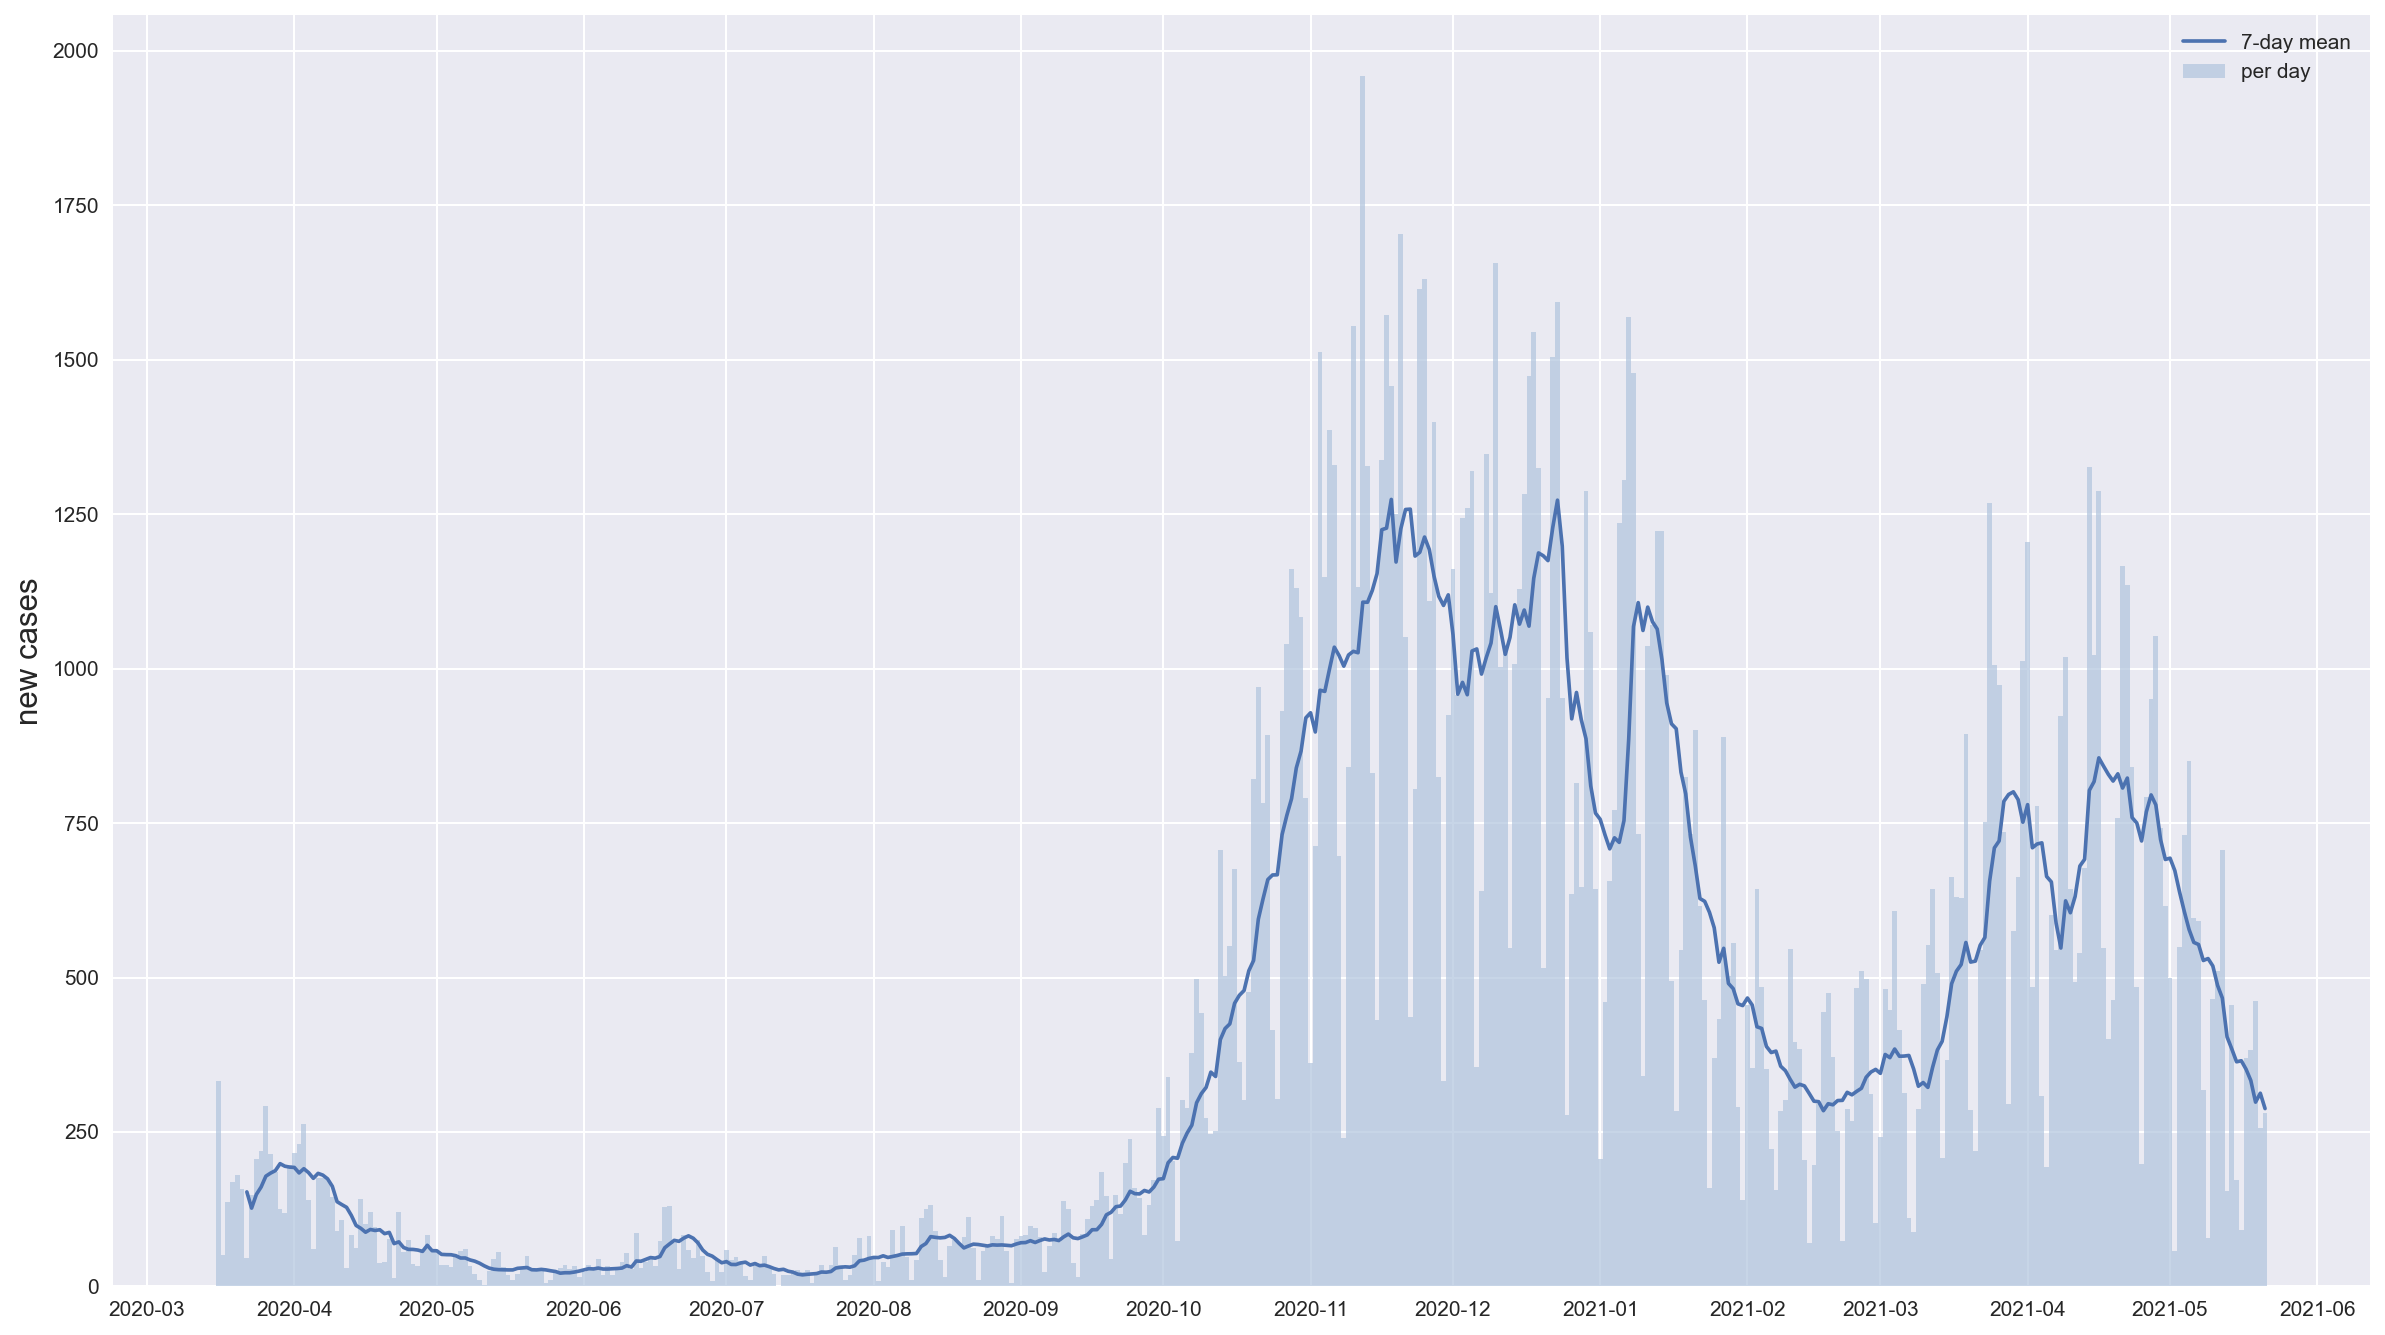

In [6]:
fig, ax = plt.subplots(figsize=(16,9), dpi=150)

ax.bar(covid_bln.index, covid_bln['neue_faelle'], 
       color='lightsteelblue', label="per day", alpha=0.7, width=1)
ax.set_ylabel("new cases", fontsize=15)

ax.plot(covid_bln.index, covid_bln['7_tage_mittel'], 
        label='7-day mean')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(MonthLocator())

ax.set_title("", fontsize=15)
ax.set_ylabel("new cases", fontsize=15)
ax.legend()

plt.style.use('seaborn')
plt.tight_layout()
plt.show()

The maximum of 1,960 new registered cases was reached on November 12, 2020. The 7-day mean peaked on November 18, 2020 with 1,273.9 cases.

### 7-day incidence rate

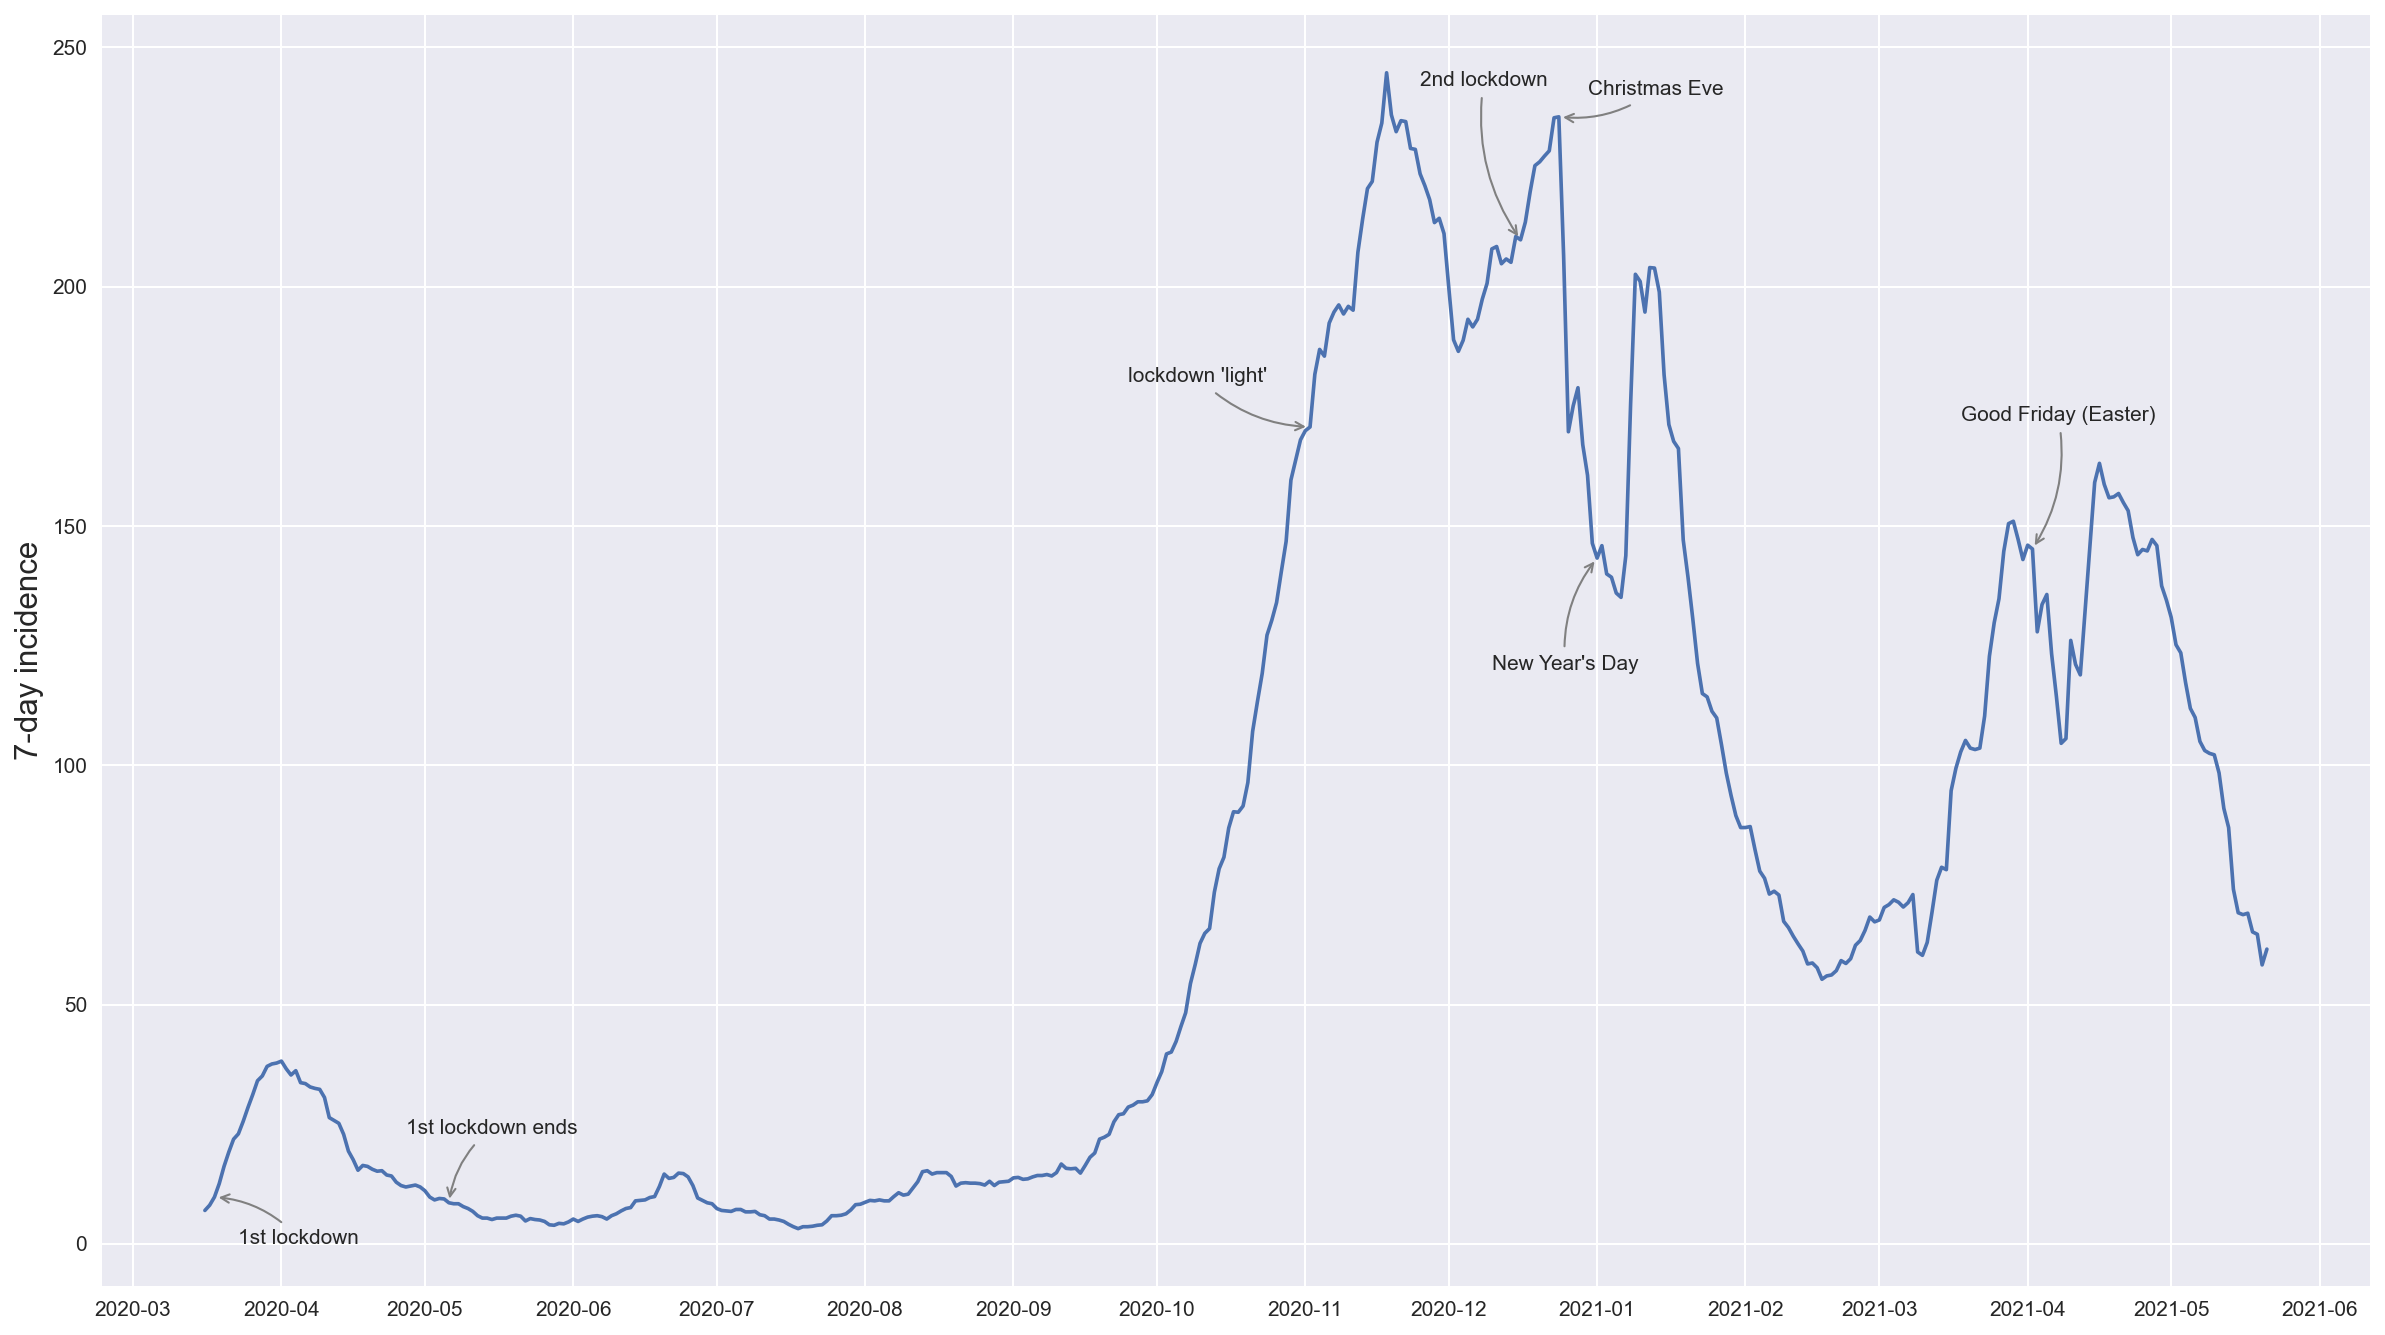

In [7]:
fig, ax = plt.subplots(figsize=(16,9), dpi=150)

ax.plot(covid_bln.index, covid_bln['7_tage_inzidenz'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(MonthLocator())

ax.set_title("", fontsize=15)
ax.set_ylabel("7-day incidence", fontsize=15)

arrow=dict(
    arrowprops=dict(
        arrowstyle='->', 
        color='grey', 
        lw=1, 
        connectionstyle='arc3,rad=0.2'
        )
    )
 
arrow_rev=dict(
    arrowprops=dict(
        arrowstyle='->', 
        color='grey', 
        lw=1, 
        connectionstyle='arc3,rad=-0.2'
        )
    )

ax.annotate("1st lockdown", xy=(dt.date(2020,3,18), covid_bln.at['2020-3-18', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,3,23), 0), **arrow)

ax.annotate("1st lockdown ends", xy=(dt.date(2020,5,6), covid_bln.at['2020-5-6', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,4,27), 23), **arrow)

ax.annotate("lockdown 'light'", xy=(dt.date(2020,11,2), covid_bln.at['2020-11-2', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,9,25), 180), **arrow)

ax.annotate("2nd lockdown", xy=(dt.date(2020,12,16), covid_bln.at['2020-12-16', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,11,25), 242), **arrow)

ax.annotate("Christmas Eve", xy=(dt.date(2020,12,24), covid_bln.at['2020-12-24', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,12,30), 240), **arrow_rev)

ax.annotate("New Year's Day", xy=(dt.date(2021,1,1), covid_bln.at['2021-1-1', '7_tage_inzidenz']), 
            xytext=(dt.date(2020,12,10), 120), **arrow_rev)

ax.annotate("Good Friday (Easter)", xy=(dt.date(2021,4,2), covid_bln.at['2021-4-2', '7_tage_inzidenz']), 
            xytext=(dt.date(2021,3,18), 172), **arrow_rev)

plt.style.use('seaborn')
plt.tight_layout()
plt.show()

The 7-day incidence rate per 100,000 reached it's maximum of 244.7 on November 18, 2020.

### 7-day incidence rate per borough

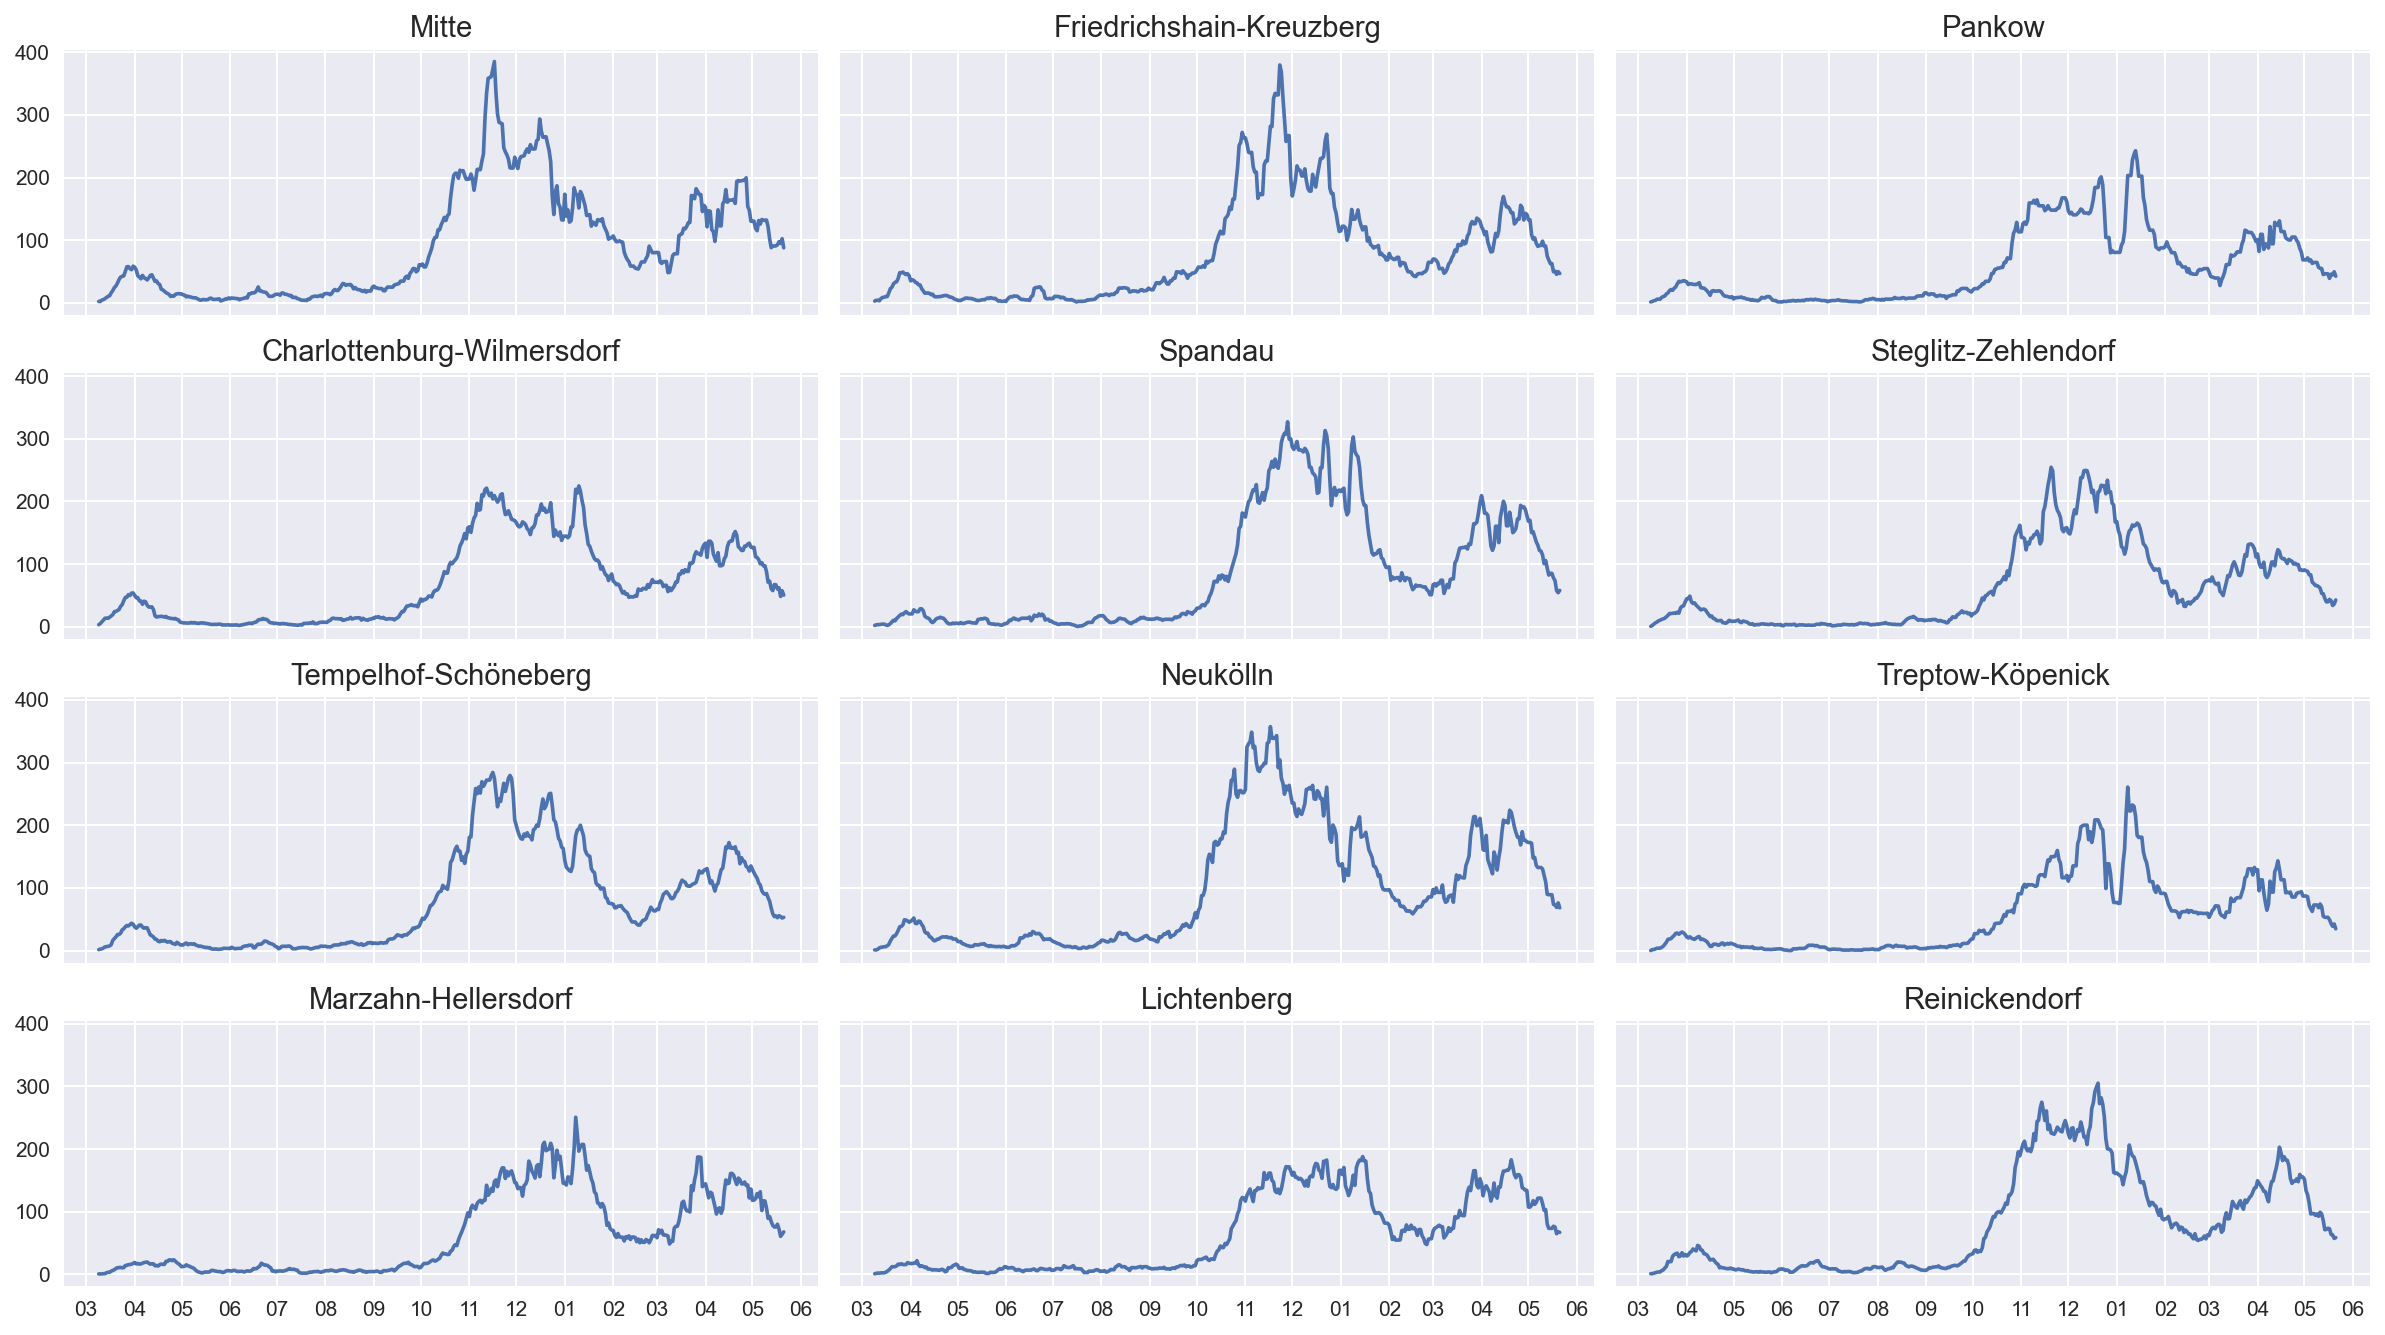

In [8]:
bor_title = ["Mitte", "Friedrichshain-Kreuzberg", "Pankow",
             "Charlottenburg-Wilmersdorf", "Spandau", "Steglitz-Zehlendorf",
             "Tempelhof-Schöneberg", "Neukölln", "Treptow-Köpenick",
             "Marzahn-Hellersdorf", "Lichtenberg", "Reinickendorf"]

fig, axes = plt.subplots(4, 3, figsize=(16,9), sharey=True, sharex=True, dpi=150)

for i, ax in enumerate(axes.flatten()):
    ax.plot(covid_bor.iloc[:,0+i])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    ax.xaxis.set_major_locator(MonthLocator())
    ax.set_title(bor_title[0+i], fontsize=14)
    ax.tick_params('x', labelrotation=0)

plt.style.use('seaborn')
plt.tight_layout()
plt.show()

Mitte and Friedrichshain-Kreuzberg show the highest 7-day incidence rate per 100,000 with 385.2 on November 17, 2020 and 379.8 on November 17, 2020. Only Lichtenberg never reaches a value of 200 and has similar maximum points in fall/winter 2020/21 and spring 2021.

### New cases by age group per week in percent

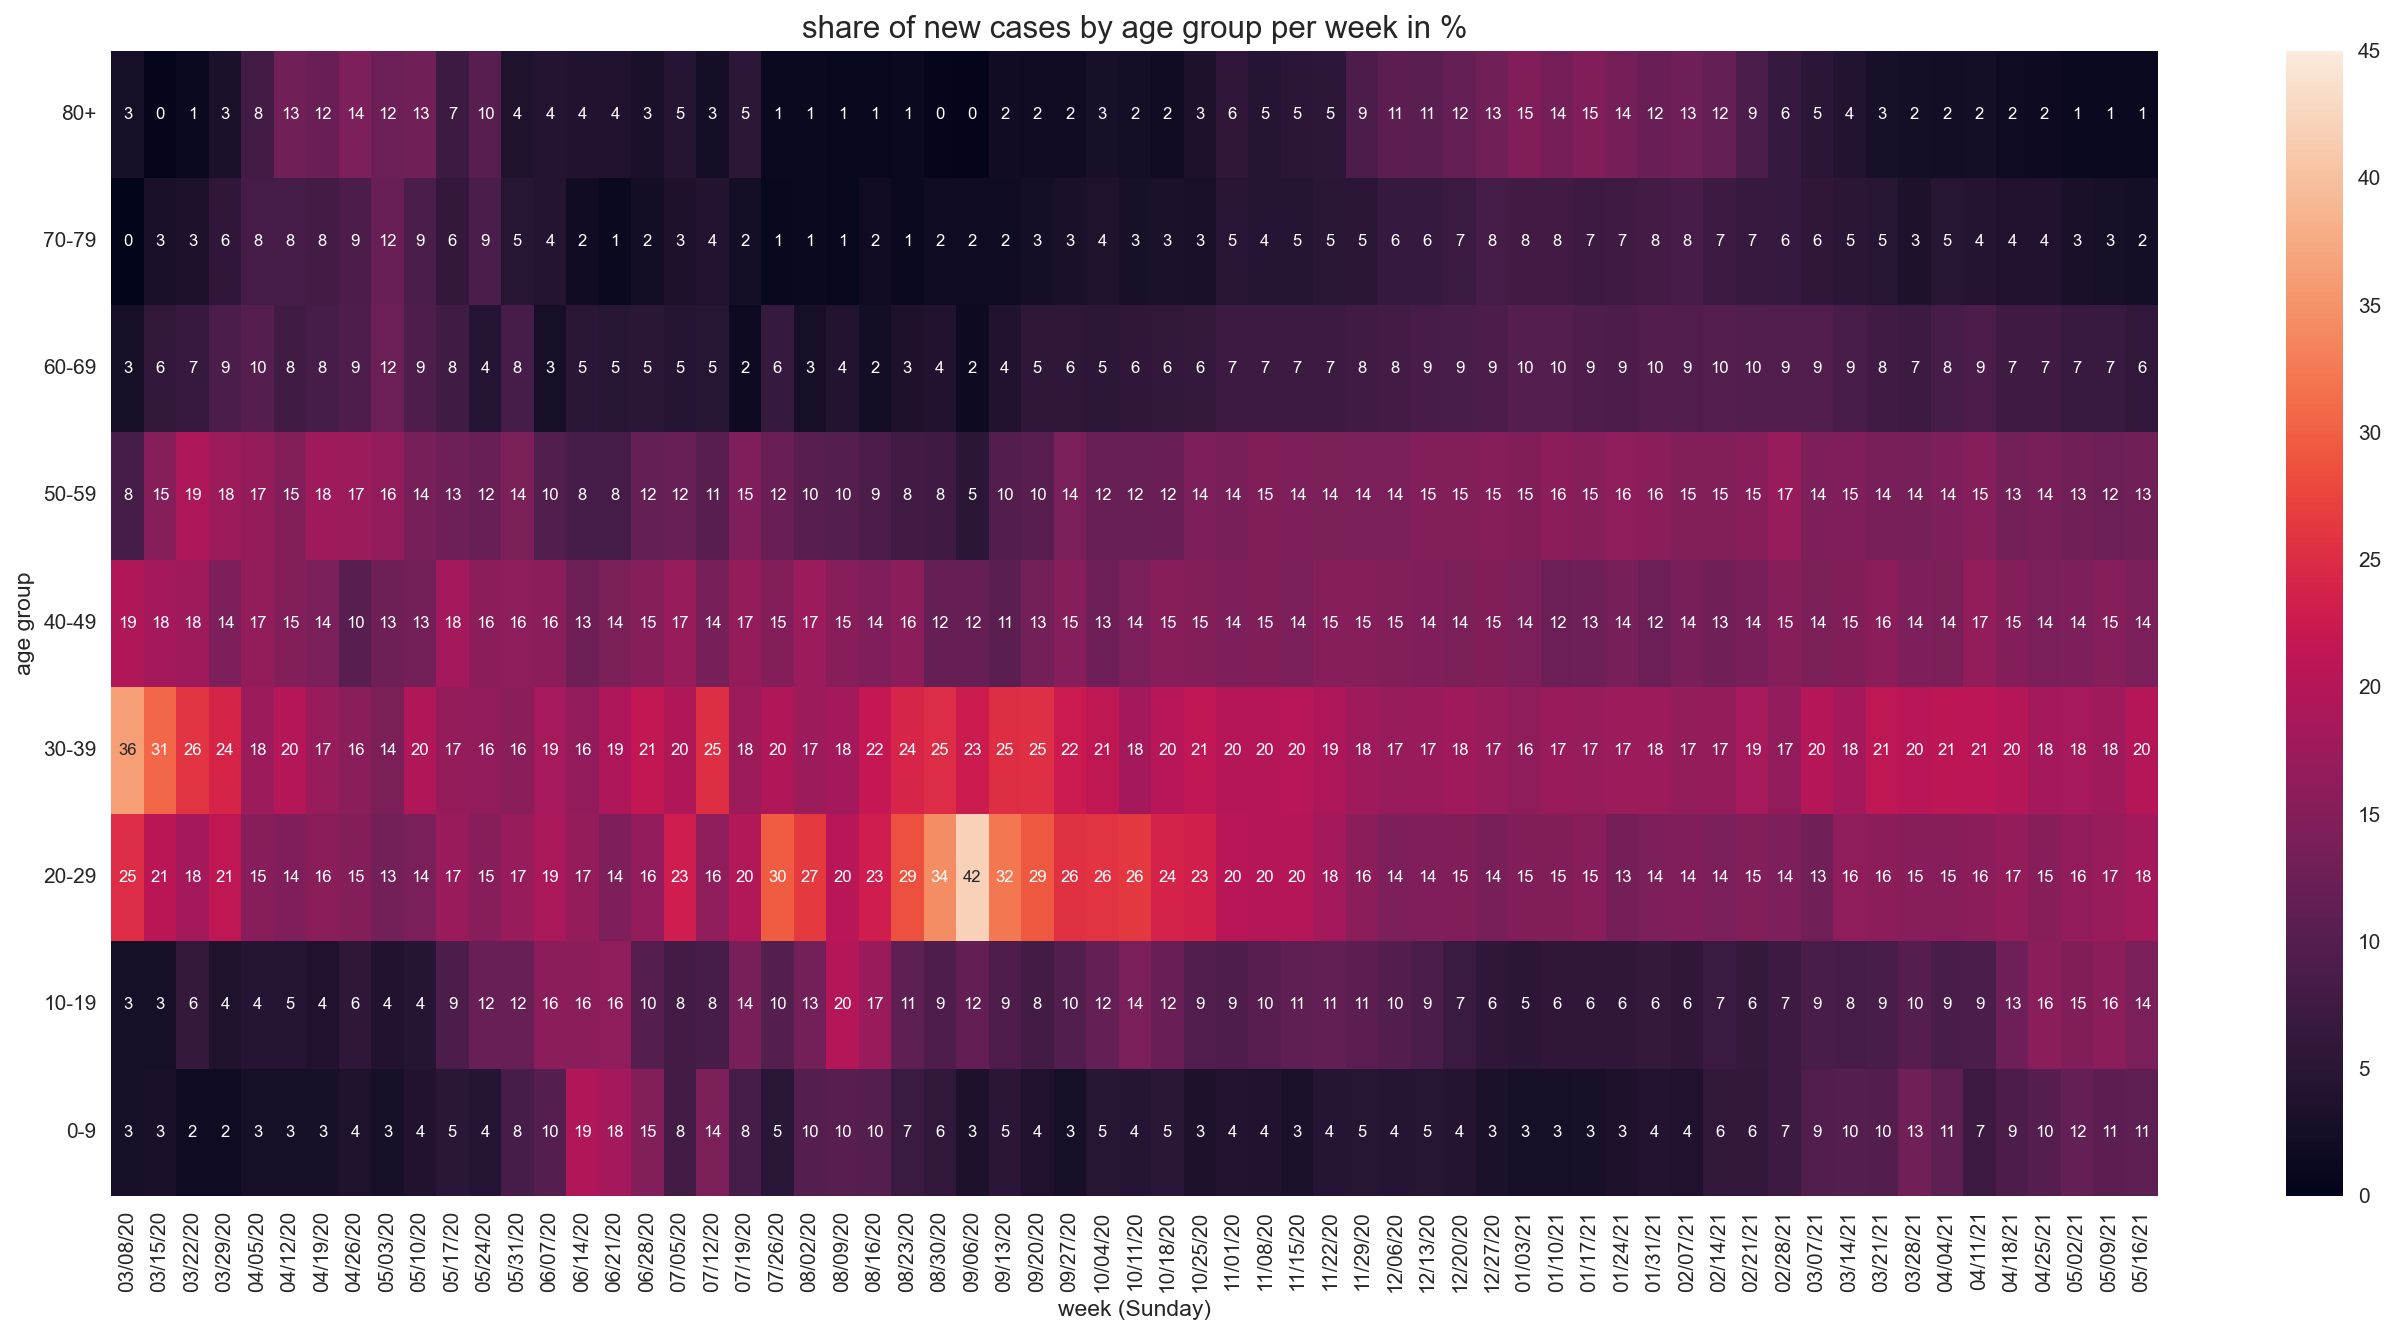

In [9]:
fig, ax = plt.subplots(figsize=(18, 9), dpi=150)

sns.heatmap(covid_age_piv.transpose(), annot=True, cmap='rocket', vmax=45, 
            fmt='.0f', annot_kws=dict(size=8, rotation=0))

ax.set_title("share of new cases by age group per week in %", fontsize=15)
ax.set_xticklabels(covid_age_piv.index, rotation=90)
ax.set_yticklabels(labels=ax.get_yticklabels(), va='center', rotation=0)
ax.set_xlabel("week (Sunday)")
ax.set_ylabel("age group")

plt.style.use('seaborn')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Overall, the age group of people from 20 to 29 years has the highest percentages of new cases, especially in summer 2020 between the first and the second wave. In the week of September 6, 2020 (Sunday) 41.8 percent of all new cases were registered in this age group.

The group of people aged 80 or older has it's peaks during the first and the second wave in spring 2020 and fall/winter 2020/21.